## Sentiment Analysis of Cricket World Cup 2019 Tweets

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 100) # Show 100 columns when looking at dataframe
import itertools
import re

In [3]:
import GetOldTweets3 as got

In [6]:
def get_tweets():
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('CWC19')\
                                           .setMaxTweets(20000)
    # list of objects stored in tweets variable
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    # itearte each tweet and get text and store it in list
    tweet_text=[[tweet.text]for tweet in tweets]
    return tweet_text

In [7]:
text=""
tweet_text=get_tweets()
length=len(tweet_text)

In [8]:
length

7085

In [9]:
tweet_text

[['#CWC19 24/6/19 Great day \u2066@HomeOfCricket\u2069 #pakvsSA'],
 ['#OnThisDay in 2019, #Pakistan beat South Africa by 49 runs in the #CWC19 at the @HomeOfCricket #goodmemories'],
 ["BY THE NUMBERS Capitalizing on the social media conversation Memorable moments and creativity The reward of social media glory This was 's #CWC19 digital journey. "],
 ['I have always had a soft corner for West Indies - maybe it was Lara, Walsh, Ambrose, Russell or Chanderpaul - always backed them when not against India. #CWC19 '],
 ['648 Runs - Most Runs By A Batsman In CWC19!! #13YearsOfHITMAN @ImRo45'],
 ['Mazhar some would say it wouldn’t have made a difference in the #IndVsPak contest at #CWC19'],
 ['This day last year Pakistan took on South Africa at the Home of Cricket. And i wore a very red top. #CWC19 @CokePk'],
 ['648 Runs - Most Runs By A Batsman In CWC19!! #13YearsOfHITMAN @ImRo45 pic.twitter.com/U94zX8jqtg'],
 ["On this day last year Team bounced back with an emphatic victory v Proteas at an

In [12]:
new = pd.DataFrame({"Text":tweet_text})

In [14]:
new.head(10)

,Text
0,[#CWC19 24/6/19 Great day ⁦@HomeOfCricket⁩ #pa...
1,"[#OnThisDay in 2019, #Pakistan beat South Afri..."
2,[BY THE NUMBERS Capitalizing on the social med...
3,[I have always had a soft corner for West Indi...
4,[648 Runs - Most Runs By A Batsman In CWC19!! ...
5,[Mazhar some would say it wouldn’t have made a...
6,[This day last year Pakistan took on South Afr...
7,[648 Runs - Most Runs By A Batsman In CWC19!! ...
8,[On this day last year Team bounced back with ...
9,[Babar Azam against NZ in #CWC19 ..The way he ...


In [15]:
new['word_count'] = new['Text'].apply(lambda x: len(str(x).split(" ")))

In [16]:
new.head()

,Text,word_count
0,[#CWC19 24/6/19 Great day ⁦@HomeOfCricket⁩ #pa...,6
1,"[#OnThisDay in 2019, #Pakistan beat South Afri...",17
2,[BY THE NUMBERS Capitalizing on the social med...,26
3,[I have always had a soft corner for West Indi...,30
4,[648 Runs - Most Runs By A Batsman In CWC19!! ...,12


In [ ]:
new.to_csv("CWC19.csv", index= False)

In [39]:
df= pd.read_csv('CWC19.csv')

In [40]:
df_new=df.copy()

In [41]:
df.isnull().sum()

Text          0
word_count    0
dtype: int64

In [42]:
df.head()

,Text,word_count
0,['#CWC19 24/6/19 Great day \u2066@HomeOfCricke...,6
1,"['#OnThisDay in 2019, #Pakistan beat South Afr...",17
2,"[""BY THE NUMBERS Capitalizing on the social me...",26
3,['I have always had a soft corner for West Ind...,30
4,['648 Runs - Most Runs By A Batsman In CWC19!!...,12


In [43]:
df.shape

(7085, 2)

In [44]:
df.drop_duplicates(subset ="Text", 
                     keep = False, inplace = True)

In [45]:
df.shape

(6676, 2)

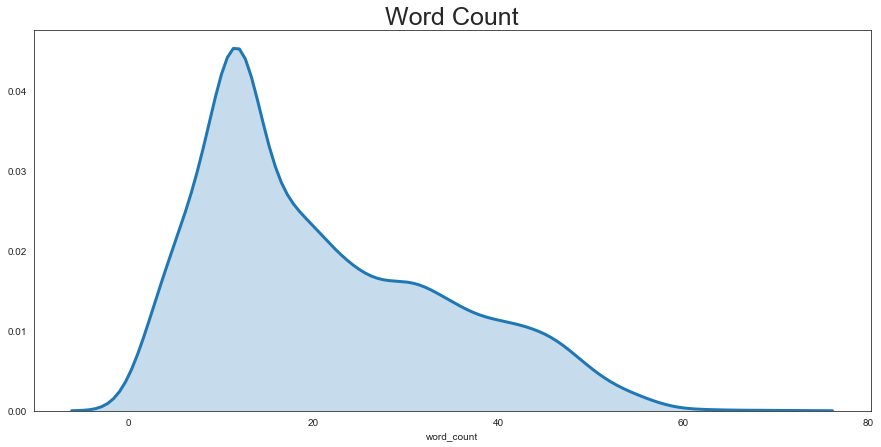

In [46]:
plt.figure(figsize= (15, 7))
sns.set_style('white')
sns.distplot(df.word_count, hist = False, kde = True, 
                 kde_kws = {'shade': True, 'linewidth': 3})
plt.title("Word Count", fontsize= 25)
plt.show()

In [47]:
import string
df['punctuation'] = [sum(char in string.punctuation for char in review) for review in df['Text']]

In [48]:
df['punctuation'].describe()

count    6676.000000
mean       13.858898
std         8.576591
min         4.000000
25%         7.000000
50%        11.000000
75%        17.000000
max        77.000000
Name: punctuation, dtype: float64

In [49]:
df.head()

,Text,word_count,punctuation
0,['#CWC19 24/6/19 Great day \u2066@HomeOfCricke...,6,11
1,"['#OnThisDay in 2019, #Pakistan beat South Afr...",17,10
2,"[""BY THE NUMBERS Capitalizing on the social me...",26,7
3,['I have always had a soft corner for West Ind...,30,11
4,['648 Runs - Most Runs By A Batsman In CWC19!!...,12,9


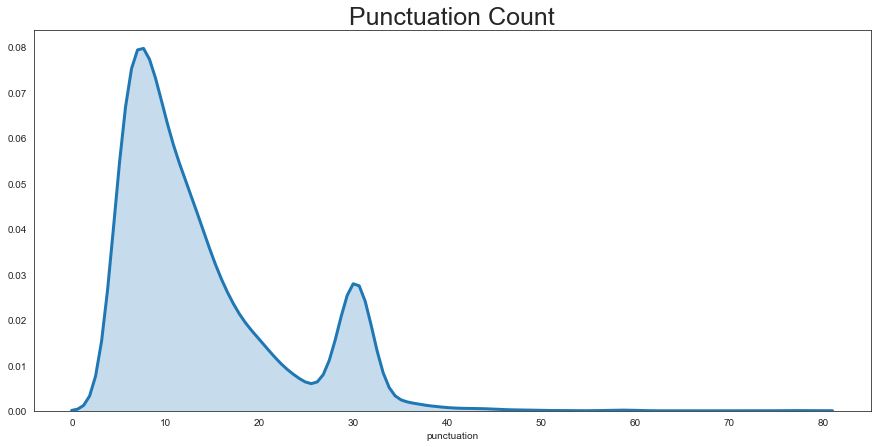

In [50]:
plt.figure(figsize= (15, 7))
sns.set_style('white')
sns.distplot(df.punctuation, hist = False, kde = True, 
                 kde_kws = {'shade': True, 'linewidth': 3})
plt.title("Punctuation Count", fontsize= 25)
plt.show()

In [51]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [52]:
import re
from collections import Counter


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

def preprocess(input_sentence):
    input_sentence = input_sentence.lower()
    input_sentence = re.sub(r'[^\w\s]','',input_sentence)
    tokens = word_tokenize(input_sentence)
    input_sentence = [i for i in tokens if not i in stop_words]
    return(input_sentence)

In [53]:
df["Text_new"]=df["Text"].apply(preprocess)

In [54]:
def most_frequent_words(list_of_sentences):
  all_words = [word for sentence in list_of_sentences for word in sentence]
  return Counter(all_words).most_common()

In [55]:
most_frequent_words(df["Text_new"])

[('cwc19', 6634),
 ('cricket', 1004),
 ('rr', 800),
 ('final', 799),
 ('world', 635),
 ('india', 582),
 ('icc', 552),
 ('england', 522),
 ('cup', 497),
 ('target', 496),
 ('2019', 481),
 ('1', 446),
 ('year', 432),
 ('match', 411),
 ('team', 381),
 ('men', 366),
 ('last', 360),
 ('vs', 352),
 ('pakistan', 350),
 ('one', 332),
 ('lfc', 332),
 ('game', 329),
 ('cricketworldcup', 322),
 ('amp', 308),
 ('win', 306),
 ('australia', 305),
 ('best', 287),
 ('time', 247),
 ('new', 238),
 ('day', 231),
 ('runs', 220),
 ('teamindia', 216),
 ('women', 215),
 ('odi', 211),
 ('first', 209),
 ('onthisday', 208),
 ('like', 197),
 ('nz', 192),
 ('well', 189),
 ('still', 187),
 ('liverpool', 185),
 ('south', 177),
 ('v', 176),
 ('zealand', 171),
 ('stokes', 164),
 ('bcci', 161),
 ('ynwa', 157),
 ('3', 153),
 ('back', 146),
 ('semifinal', 145),
 ('today', 144),
 ('us', 144),
 ('good', 143),
 ('great', 142),
 ('played', 141),
 ('ball', 141),
 ('get', 141),
 ('englandcricket', 140),
 ('watch', 139),
 ('ro

#### The most frequent words are CWC19 , cricket , final , india , icc

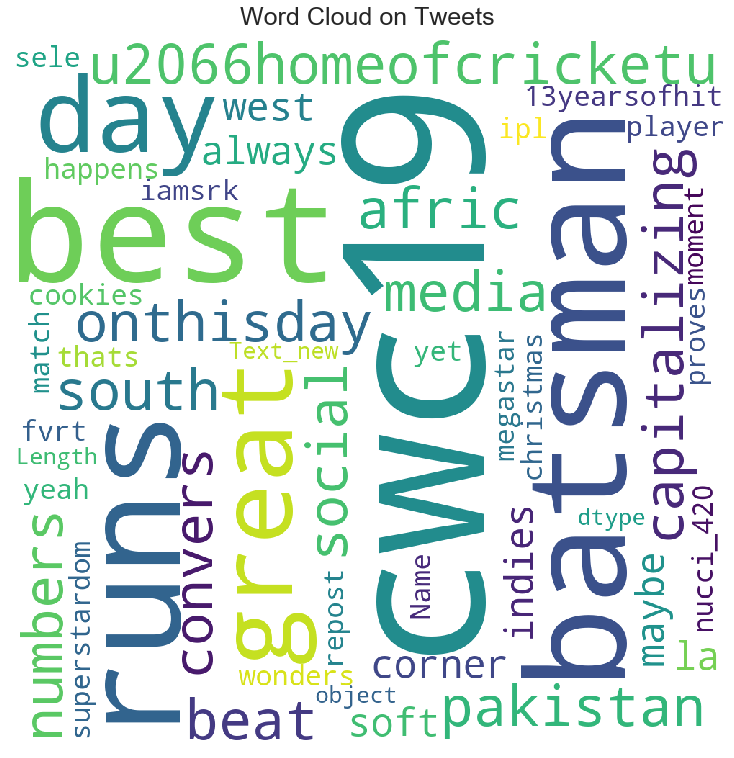

In [56]:
from wordcloud import WordCloud
from os import path, getcwd
from PIL import Image
d = getcwd()
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 10).generate(str(df.Text_new)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Word Cloud on Tweets", fontdict={'fontsize': 25})
plt.show()

## TextBlob

In [57]:
from textblob import TextBlob

In [58]:
def get_senti(text):
  analysis = TextBlob(text)
  return analysis.sentiment.polarity

In [59]:
df['Textblob_polarity']= df.Text.apply(get_senti)

In [60]:
df.head(20)

,Text,word_count,punctuation,Text_new,Textblob_polarity
0,['#CWC19 24/6/19 Great day \u2066@HomeOfCricke...,6,11,"[cwc19, 24619, great, day, u2066homeofcricketu...",0.800000
1,"['#OnThisDay in 2019, #Pakistan beat South Afr...",17,10,"[onthisday, 2019, pakistan, beat, south, afric...",0.000000
2,"[""BY THE NUMBERS Capitalizing on the social me...",26,7,"[numbers, capitalizing, social, media, convers...",0.141667
3,['I have always had a soft corner for West Ind...,30,11,"[always, soft, corner, west, indies, maybe, la...",0.100000
4,['648 Runs - Most Runs By A Batsman In CWC19!!...,12,9,"[648, runs, runs, batsman, cwc19, 13yearsofhit...",0.781250
5,['Mazhar some would say it wouldn’t have made ...,16,6,"[mazhar, would, say, wouldnt, made, difference...",0.000000
6,['This day last year Pakistan took on South Af...,23,8,"[day, last, year, pakistan, took, south, afric...",0.166667
7,['648 Runs - Most Runs By A Batsman In CWC19!!...,13,12,"[648, runs, runs, batsman, cwc19, 13yearsofhit...",0.781250
8,"[""On this day last year Team bounced back with...",37,11,"[day, last, year, team, bounced, back, emphati...",0.200000
9,['Babar Azam against NZ in #CWC19 ..The way he...,23,9,"[babar, azam, nz, cwc19, way, played, spin, pr...",0.300000


In [61]:
df['Textblob_polarity'].describe()

count    6676.000000
mean        0.121471
std         0.273260
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.250000
max         1.000000
Name: Textblob_polarity, dtype: float64

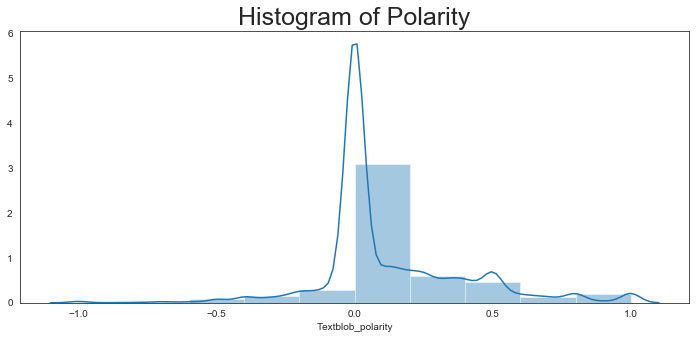

In [62]:
plt.figure(figsize= (12, 5))
sns.set_style('white')
sns.distplot(df.Textblob_polarity, bins=10)
plt.title("Histogram of Polarity", fontsize= 25)
plt.show()

In [65]:
def TextBlob_class(x):
    if x >0.50:
        return "POSITIVE"
    elif x <-0.50:
        return "NEGATIVE"
    else:
        return "NEUTRAL"

In [66]:
df["Sentiment"]=df["Textblob_polarity"].apply(TextBlob_class)

In [67]:
df.head(10)

,Text,word_count,punctuation,Text_new,Textblob_polarity,Sentiment
0,['#CWC19 24/6/19 Great day \u2066@HomeOfCricke...,6,11,"[cwc19, 24619, great, day, u2066homeofcricketu...",0.800000,POSITIVE
1,"['#OnThisDay in 2019, #Pakistan beat South Afr...",17,10,"[onthisday, 2019, pakistan, beat, south, afric...",0.000000,NEUTRAL
2,"[""BY THE NUMBERS Capitalizing on the social me...",26,7,"[numbers, capitalizing, social, media, convers...",0.141667,NEUTRAL
3,['I have always had a soft corner for West Ind...,30,11,"[always, soft, corner, west, indies, maybe, la...",0.100000,NEUTRAL
4,['648 Runs - Most Runs By A Batsman In CWC19!!...,12,9,"[648, runs, runs, batsman, cwc19, 13yearsofhit...",0.781250,POSITIVE
5,['Mazhar some would say it wouldn’t have made ...,16,6,"[mazhar, would, say, wouldnt, made, difference...",0.000000,NEUTRAL
6,['This day last year Pakistan took on South Af...,23,8,"[day, last, year, pakistan, took, south, afric...",0.166667,NEUTRAL
7,['648 Runs - Most Runs By A Batsman In CWC19!!...,13,12,"[648, runs, runs, batsman, cwc19, 13yearsofhit...",0.781250,POSITIVE
8,"[""On this day last year Team bounced back with...",37,11,"[day, last, year, team, bounced, back, emphati...",0.200000,NEUTRAL
9,['Babar Azam against NZ in #CWC19 ..The way he...,23,9,"[babar, azam, nz, cwc19, way, played, spin, pr...",0.300000,NEUTRAL


## Positive Tweets

In [72]:
positive=df.loc[df.Sentiment=="POSITIVE", 'Text']

In [77]:
positive.head(30)

0      ['#CWC19 24/6/19 Great day \u2066@HomeOfCricke...
4      ['648 Runs - Most Runs By A Batsman In CWC19!!...
7      ['648 Runs - Most Runs By A Batsman In CWC19!!...
47     ['The best memory of #CWC19 in the form of #ph...
48                         ['On of the best of #CWC19 ']
53     ['Best of #CWC19, Carlos Brathwaite remember t...
56     ["Many Hearts @TridentSportsX One of the Great...
66     ['I never tire of watching this masterfully cr...
80     ['Best nail biting match of CWC19. Carlos was ...
86     ['Our hearts were in our hands! A memorable ma...
88     [' #CWC19Rewind : MOOD! Our drummers are lovin...
93     [' "New Zealand win... The dream is diminished...
117    ['#OnThisDay at #CWC19 | @Jaspritbumrah93 and ...
128    ['This is why @BLACKCAPS are the most loved te...
131    ['#OnThisDay at #CWC19 | @Jaspritbumrah93 and ...
132    ['#OnThisDay last year at the #CWC19 An incred...
137    ['One of the best performer of #cwc19 4 மேட்ச்...
148    ['Dei u said "wish I sta

In [78]:
positive[53]

"['Best of #CWC19, Carlos Brathwaite remember the name #NZvWI | #CWC19 ']"

In [79]:
positive[56]

'["Many Hearts @TridentSportsX One of the Greatest inning...i can\'t forget #NZvsWI #CWC19 "]'

In [80]:
positive[66]

"['I never tire of watching this masterfully crafted video from our star @daylestancliffe. Also, this was probably the best @irbishi and @TridentSportsX partnership in a losing cause for the West Indies. #CWC19 ']"

In [81]:
positive[86]

"['Our hearts were in our hands! A memorable match and a splendid effort by @TridentSportsX and the #MenInMaroon #OnThisDay #CWC19 ']"

In [82]:
positive[128]

"['This is why @BLACKCAPS are the most loved team! Despite winning, the first thing that the team does is reach out to @TridentSportsX &amp; say well done mate on making this a great contest This is what sport is always meant to be! It was a great sight #OnThisDay last year in #CWC19 ']"

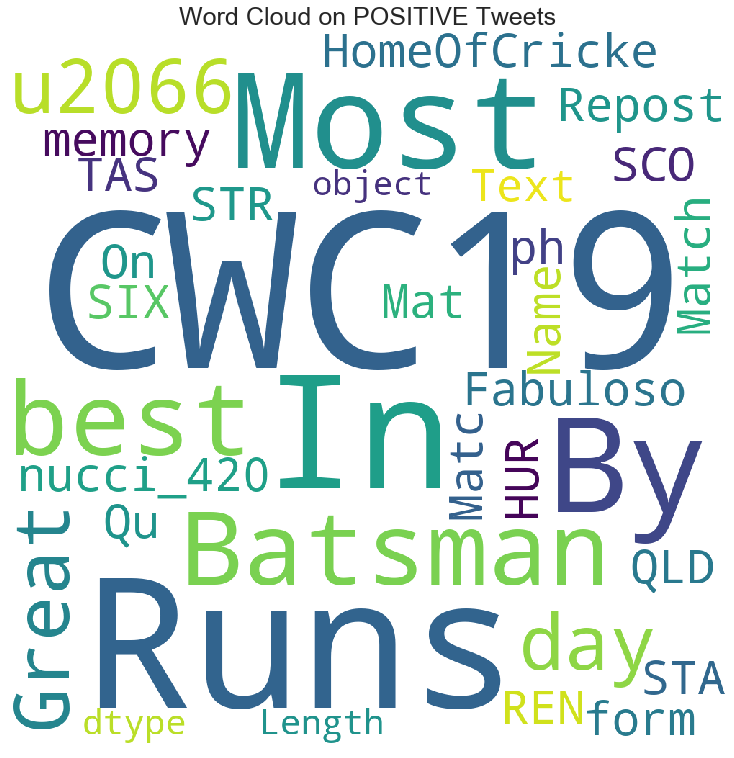

In [139]:
from wordcloud import WordCloud, STOPWORDS
from os import path, getcwd
from PIL import Image
d = getcwd()
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 10,stopwords = STOPWORDS).generate(str(positive)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Word Cloud on POSITIVE Tweets", fontdict={'fontsize': 25})
plt.show()

## Negative Sentiments

In [118]:
negative=df.loc[df.Sentiment=="NEGATIVE", 'Text']

In [119]:
negative.head(30)

24      ["#OnThisDay in 2019, SA's disappointing World...
28      ['है भगवान! हमारे देश पर किसकी बुरी नज़र लगी ह...
452     ['And that damn bloody bouncer to the man who ...
864     ["Rank each of Rohit Sharma's centuries in #CW...
1161    ["I was really disappointed with India that th...
1429    ["Hey my Thumbs,do you know? CWC19 was the wor...
1471    ["What if Pakistan hadn't played so badly in t...
1627    ['Bad play of 30 minutes, that too 5PM on 10 J...
1792    ['My #CWC19 #CricketWorldCup 2019 souvenirs I ...
2183    ['Watching this back reminds me of how bad the...
2184    ['Forgot how much I hated that cricket bat gui...
2187    ['One of the nicest travesties off the #cwc19 ...
2215                ["No Pepe's chicken adverts? #CWC19"]
2243    [" UNFAIR! centuries in CWC 2019 &amp; still R...
2451    ['Wooaaaaahhhhhhhhh my heart was in my mouth!!...
2467    ["@WisdenCricket could you perhaps inquire As ...
2592    ['So jaddu needed to get his jersey dirty in c...
2915    ["In M

In [120]:
negative[4361]

'[\'"For the bearest of all margins,absolute ectasy for England ugly for Newzealand" #momentsofthedecade #CWC19 #Lords\']'

In [121]:
negative[2184]

"['Forgot how much I hated that cricket bat guitar during the #CWC19 #SkyEasterWatchalong']"

In [122]:
negative[452]

"['And that damn bloody bouncer to the man who got run out while trying to run two...could see he was hurt when he tried to take off for the run. #CWC19 #semis']"

In [123]:
negative[1471]

'["What if Pakistan hadn\'t played so badly in the opening game of CWC19 against Windies What if SA didn\'t choke against NZ 2015 semis What if mcgrath never stepped on that ball warming up in the ashes What if Sachin wasn\'t dropped 6 times in the 2011 semi"]'

In [124]:
negative[1429]

'["Hey my Thumbs,do you know? CWC19 was the worst world cup in world cup history. England took advantages of \'world cup at home\'."]'

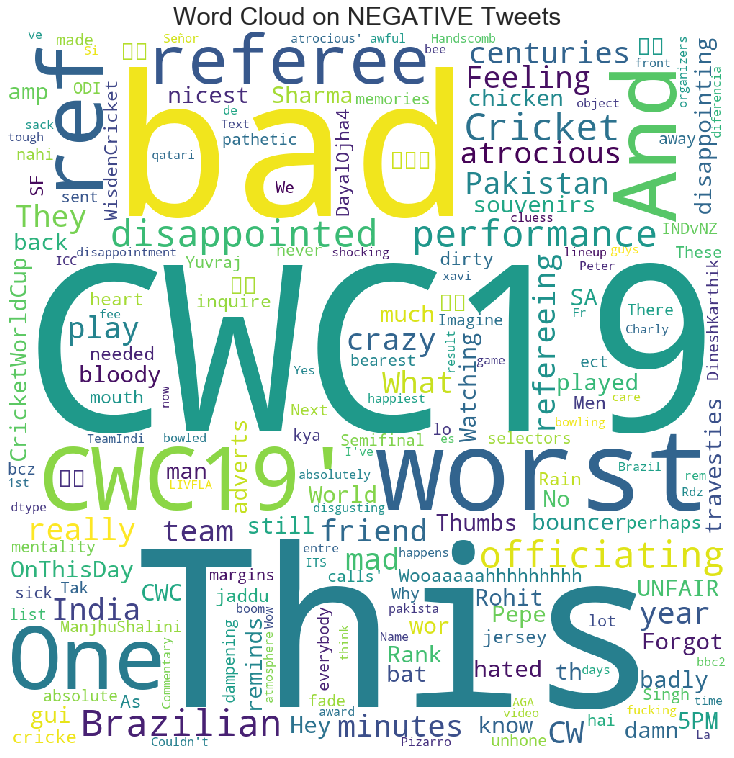

In [140]:
from wordcloud import WordCloud, STOPWORDS
from os import path, getcwd
from PIL import Image
d = getcwd()
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 10,stopwords = STOPWORDS).generate(str(negative)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Word Cloud on NEGATIVE Tweets", fontdict={'fontsize': 25})
plt.show()

## Vader Sentiment Analyser

In [90]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def comp_score(text):
   return analyser.polarity_scores(text)["compound"]   
  
def neg(text):
   return analyser.polarity_scores(text)["neg"]   

def pos(text):
   return analyser.polarity_scores(text)["pos"]  

In [91]:
df_new["Vader_sentiment"] = df_new["Text"].apply(comp_score)
df_new["Vader_pos"] = df_new["Text"].apply(pos)
df_new["Vader_neg"] = df_new["Text"].apply(neg)

In [92]:
df_new.head(20)

,Text,word_count,Vader_sentiment,Vader_pos,Vader_neg
0,['#CWC19 24/6/19 Great day \u2066@HomeOfCricke...,6,0.6249,0.451,0.000
1,"['#OnThisDay in 2019, #Pakistan beat South Afr...",17,0.0000,0.000,0.000
2,"[""BY THE NUMBERS Capitalizing on the social me...",26,0.8689,0.299,0.000
3,['I have always had a soft corner for West Ind...,30,0.0258,0.037,0.000
4,['648 Runs - Most Runs By A Batsman In CWC19!!...,12,0.0000,0.000,0.000
5,['Mazhar some would say it wouldn’t have made ...,16,0.0000,0.000,0.000
6,['This day last year Pakistan took on South Af...,23,0.2682,0.086,0.000
7,['648 Runs - Most Runs By A Batsman In CWC19!!...,13,0.0000,0.000,0.000
8,"[""On this day last year Team bounced back with...",37,0.7500,0.154,0.000
9,['Babar Azam against NZ in #CWC19 ..The way he...,23,0.1280,0.159,0.140


In [95]:
def vader(x):
    if x >0.50:
        return "POSITIVE"
    elif x <-0.50:
        return "NEGATIVE"
    else:
        return "NEUTRAL"

In [96]:
df_new["Sentiment"]=df_new["Vader_sentiment"].apply(vader)

In [97]:
df_new.head()

,Text,word_count,Vader_sentiment,Vader_pos,Vader_neg,Sentiment
0,['#CWC19 24/6/19 Great day \u2066@HomeOfCricke...,6,0.6249,0.451,0.0,POSITIVE
1,"['#OnThisDay in 2019, #Pakistan beat South Afr...",17,0.0000,0.000,0.0,NEUTRAL
2,"[""BY THE NUMBERS Capitalizing on the social me...",26,0.8689,0.299,0.0,POSITIVE
3,['I have always had a soft corner for West Ind...,30,0.0258,0.037,0.0,NEUTRAL
4,['648 Runs - Most Runs By A Batsman In CWC19!!...,12,0.0000,0.000,0.0,NEUTRAL


## Positive sentiments in vader

In [98]:
positive_vader=df_new.loc[df_new.Sentiment=="POSITIVE", 'Text']

In [99]:
positive_vader.head(20)

0     ['#CWC19 24/6/19 Great day \u2066@HomeOfCricke...
2     ["BY THE NUMBERS Capitalizing on the social me...
8     ["On this day last year Team bounced back with...
12    ['#onthisday2019 It was a full house at Lords....
15    ["#OnThisDay last year, the cricketing world w...
19    ["ICC: #OnThisDay last year, the cricketing wo...
35    ['What a game that was, still remember watchin...
39    ['On this day in 2019 Nz beat WI in #CWC19 in ...
41    ['The gorgeous #ageasbowl #onthisday last year...
42    ['The gorgeous #ageasbowl #onthisday last year...
47    ['The best memory of #CWC19 in the form of #ph...
48                        ['On of the best of #CWC19 ']
50    ["#13YearsOfHITMAN She was being hit by ball o...
53    ['Best of #CWC19, Carlos Brathwaite remember t...
56    ["Many Hearts @TridentSportsX One of the Great...
58    ['CWC19 was a dream for a digital video produc...
69    ['I remember watching it live ! High pulsating...
70    ['"Rohit makes it look so easy, he\'s so p

In [100]:
positive_vader[53]

"['Best of #CWC19, Carlos Brathwaite remember the name #NZvWI | #CWC19 ']"

In [101]:
positive_vader[56]

'["Many Hearts @TridentSportsX One of the Greatest inning...i can\'t forget #NZvsWI #CWC19 "]'

In [103]:
positive_vader[86]

"['Our hearts were in our hands! A memorable match and a splendid effort by @TridentSportsX and the #MenInMaroon #OnThisDay #CWC19 ']"

In [104]:
positive_vader[128]

"['This is why @BLACKCAPS are the most loved team! Despite winning, the first thing that the team does is reach out to @TridentSportsX &amp; say well done mate on making this a great contest This is what sport is always meant to be! It was a great sight #OnThisDay last year in #CWC19 ']"

In [102]:
positive_vader[66]

KeyError: 66

In [105]:
positive[66]

"['I never tire of watching this masterfully crafted video from our star @daylestancliffe. Also, this was probably the best @irbishi and @TridentSportsX partnership in a losing cause for the West Indies. #CWC19 ']"

In [106]:
df_new.iloc[66]

Text               ['I never tire of watching this masterfully cr...
word_count                                                        33
Vader_sentiment                                               0.3818
Vader_pos                                                      0.111
Vader_neg                                                      0.069
Sentiment                                                    NEUTRAL
Name: 66, dtype: object

### The above statement is classified as POSITIVE in TextBlob but not in Vader Sentiment Analyser

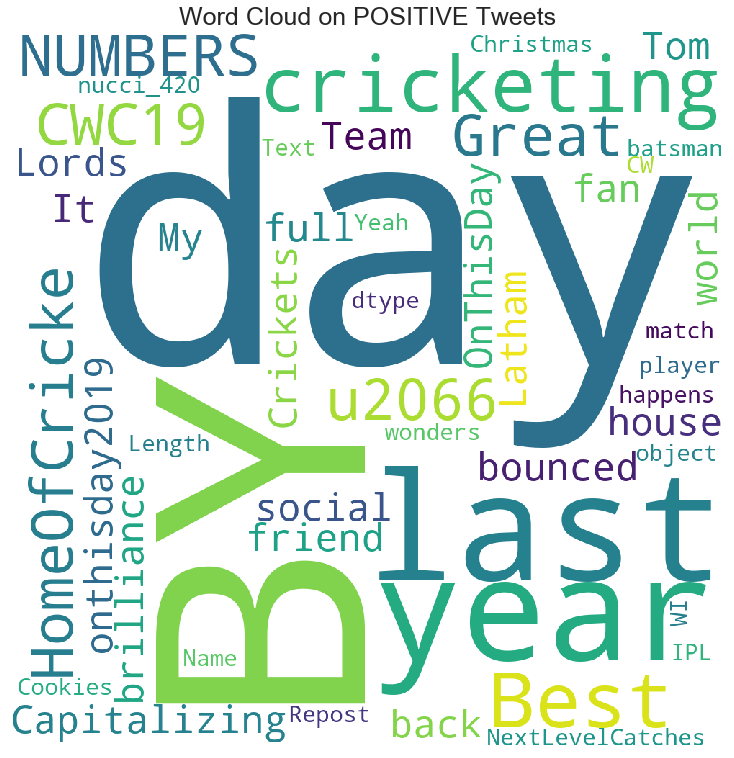

In [137]:
from wordcloud import WordCloud, STOPWORDS
from os import path, getcwd
from PIL import Image
d = getcwd()
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 10,stopwords = STOPWORDS).generate(str(positive_vader)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Word Cloud on POSITIVE Tweets", fontdict={'fontsize': 25})
plt.show()

## Negative sentiments in vader

In [110]:
negative_vader=df_new.loc[df_new.Sentiment=="NEGATIVE", 'Text']

In [111]:
negative_vader.head(30)

11     ["This time last year I was at Lord's for Paki...
24     ["#OnThisDay in 2019, SA's disappointing World...
28     ['है भगवान! हमारे देश पर किसकी बुरी नज़र लगी ह...
85     ['This day last year @King19724 and I travel 1...
91     ['West Indies hurt Pakistan twice in #CWC19 by...
173    ['Shameful claims, you didnt even win a single...
196    ["A year ago watching #NewZealand v #SouthAfri...
215    ['Waqar Younis "They did not really let the bo...
256    ['Stop boasting about this victory.... we are ...
268    ['#OnThisDay An explosive innings from @Eoin16...
269    ['Pakistan will never forget this #CWC19. Paki...
270    ['.@ACBofficials: Aftab Alam joins team after ...
286    ["I can't remember the name, but I'm pretty mu...
319    ['Did cricket twitter really rate Kane or Newz...
329    [' #CWC19Rewind : HITMAN ON FIRE! @ImRo45 beco...
332    ['Man I miss these golden days I was so damn h...
365    ['India loss in #CWC19 why means because of to...
425    ['Bad to sirf umpiring t

In [113]:
negative_vader[4361]

'[\'"For the bearest of all margins,absolute ectasy for England ugly for Newzealand" #momentsofthedecade #CWC19 #Lords\']'

In [114]:
negative_vader[2184]

"['Forgot how much I hated that cricket bat guitar during the #CWC19 #SkyEasterWatchalong']"

In [115]:
negative_vader[452]

"['And that damn bloody bouncer to the man who got run out while trying to run two...could see he was hurt when he tried to take off for the run. #CWC19 #semis']"

In [125]:
negative_vader[1471]

KeyError: 1471

In [126]:
negative_vader[1429]

KeyError: 1429

In [127]:
negative[1429]

'["Hey my Thumbs,do you know? CWC19 was the worst world cup in world cup history. England took advantages of \'world cup at home\'."]'

In [128]:
negative[1471]

'["What if Pakistan hadn\'t played so badly in the opening game of CWC19 against Windies What if SA didn\'t choke against NZ 2015 semis What if mcgrath never stepped on that ball warming up in the ashes What if Sachin wasn\'t dropped 6 times in the 2011 semi"]'

In [131]:
df_new.iloc[[1429,1471]]

,Text,word_count,Vader_sentiment,Vader_pos,Vader_neg,Sentiment
1429,"[""Hey my Thumbs,do you know? CWC19 was the wor...",23,-0.3818,0.091,0.149,NEUTRAL
1471,"[""What if Pakistan hadn't played so badly in t...",48,-0.3772,0.082,0.111,NEUTRAL


### The above statements are classified as NEGATIVE in Text Blob but in Vader it is termed as "NEUTRAL". In real these two statements have negative sentiments and Text blob classified correctly.

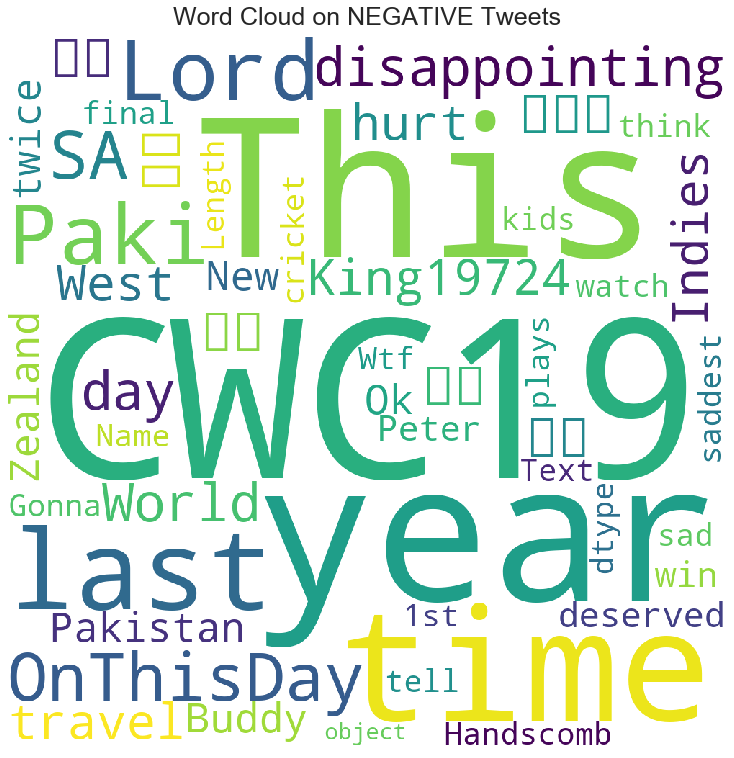

In [138]:
from wordcloud import WordCloud, STOPWORDS
from os import path, getcwd
from PIL import Image
d = getcwd()
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 10,stopwords = STOPWORDS).generate(str(negative_vader)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Word Cloud on NEGATIVE Tweets", fontdict={'fontsize': 25})
plt.show()

### In our analysis, we can able to infer that some libraries work better at detecting positive sentiments, others work better with negative data sets.